The Problem Statement:
The goal is to build a regression model that can predict the price of a car based on its various features such as year, mileage, fuel type, transmission,engine type, etc.

This project will help:
1.Understand data preprocessing techniques
2.Apply regression algorithms
3.Evaluate model performance


**Importing the Libraries**

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**IMPORTING THE DATASET**

In [91]:
df = pd.read_csv("ford.csv")

**DATASET**

In [92]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


**EXPLORAT0RY** **DATA** **ANALYSIS**

Exploring the data to gain key insights about the data

Viewing the top 5 rows of the dataset

In [93]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Viewing the shape of the dataset

In [94]:
df.shape

(17966, 9)

Viewing the summary of dataset

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [96]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Checking the missing values in the dataset

we can see that there are no missing values(NaN).

In [97]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


Outliers in numerical variables

In [98]:
print(round(df.describe(),2))

           year     price    mileage       tax       mpg  engineSize
count  17966.00  17966.00   17966.00  17966.00  17966.00    17966.00
mean    2016.87  12279.53   23362.61    113.33     57.91        1.35
std        2.05   4741.34   19472.05     62.01     10.13        0.43
min     1996.00    495.00       1.00      0.00     20.80        0.00
25%     2016.00   8999.00    9987.00     30.00     52.30        1.00
50%     2017.00  11291.00   18242.50    145.00     58.90        1.20
75%     2018.00  15299.00   31060.00    145.00     65.70        1.50
max     2060.00  54995.00  177644.00    580.00    201.80        5.00


Random Forest Regressor is robust to outliers

**DATA VISUALIZATION**

Plotting a histogram for price.

<Axes: xlabel='price', ylabel='Count'>

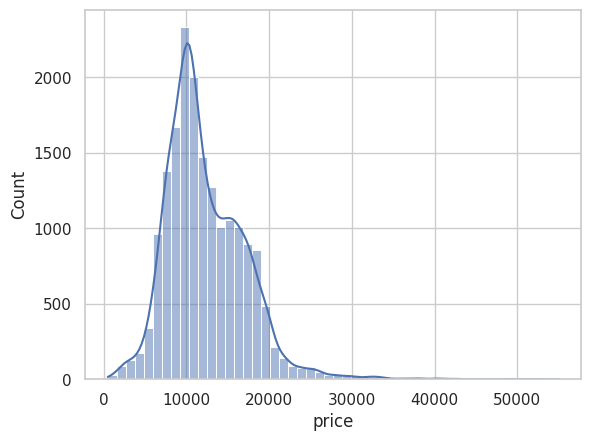

In [99]:

sns.histplot(df['price'],bins = 50,kde = True)

Plotting a heatmap to describe correlation between the columns of the dataset

<Axes: >

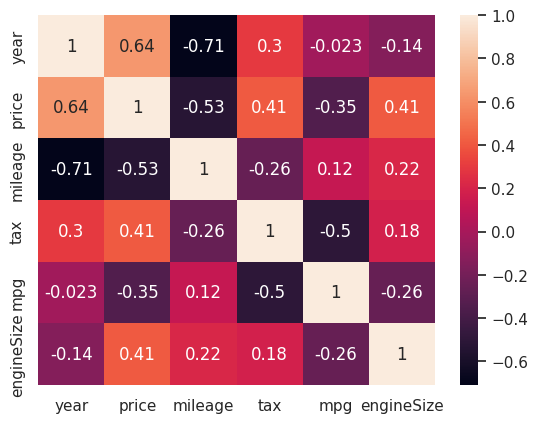

In [100]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

Plotting a boxplot for year vs price

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

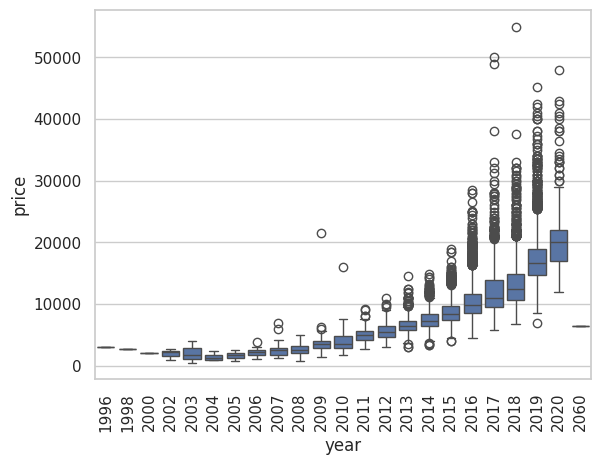

In [101]:
sns.boxplot(data = df, x = 'year', y = 'price')
plt.xticks(rotation = 90)

Plotting a scatterplot for mileage vs price

<Axes: xlabel='mileage', ylabel='price'>

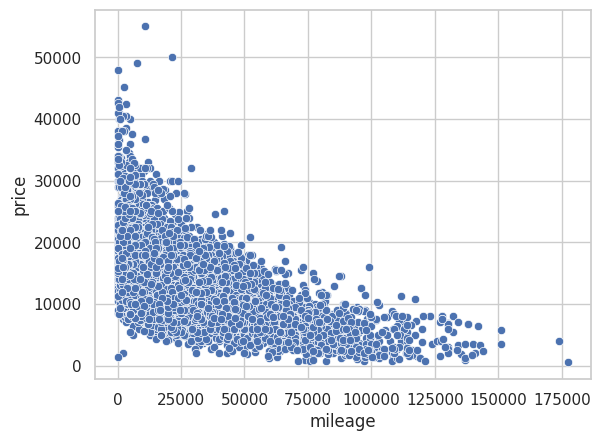

In [102]:
sns.scatterplot(data = df, x = 'mileage',y = 'price')

Plotting a boxplot for enginesize vs price

<Axes: xlabel='engineSize', ylabel='price'>

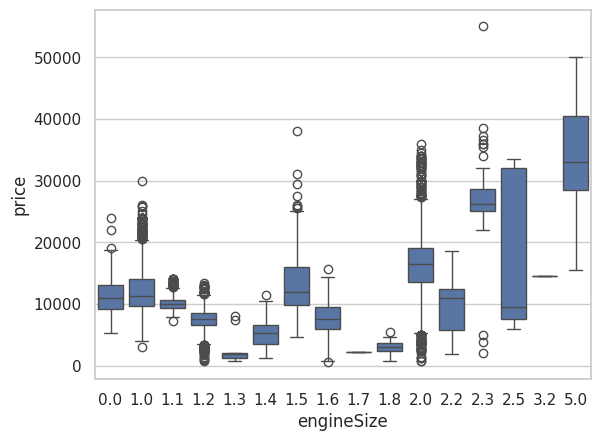

In [103]:
sns.boxplot(data = df, x = 'engineSize', y = 'price')

Viewing all the unique columns of the dataset

In [104]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

Now plotting a boxplot for transmission vs price

<Axes: xlabel='transmission', ylabel='price'>

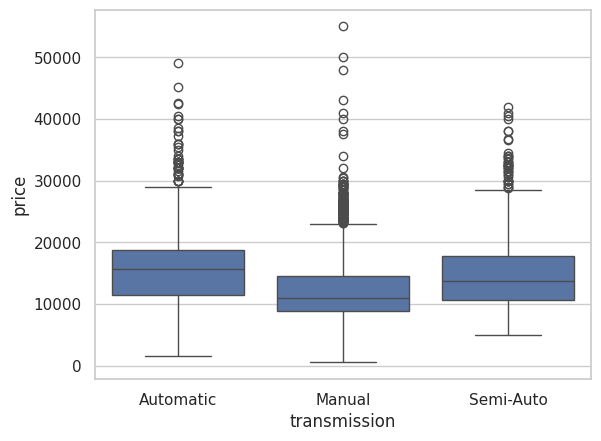

In [105]:
sns.boxplot(data = df, x = 'transmission',y = 'price')

Plotting a scatter plot for fuel-type vs price.

<Axes: xlabel='fuelType', ylabel='price'>

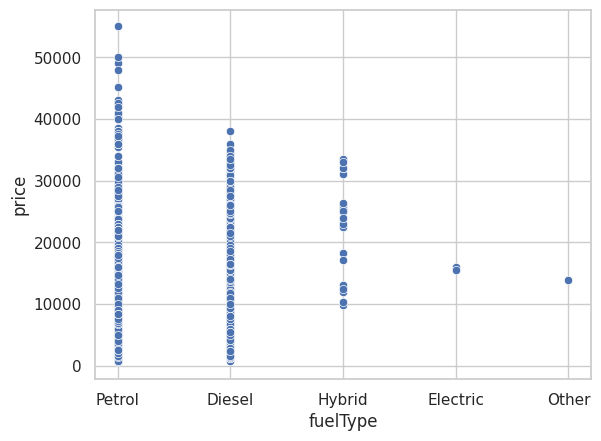

In [106]:
sns.scatterplot(data = df,x = 'fuelType', y = 'price' )

Plotting a box plot for tax vs price.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

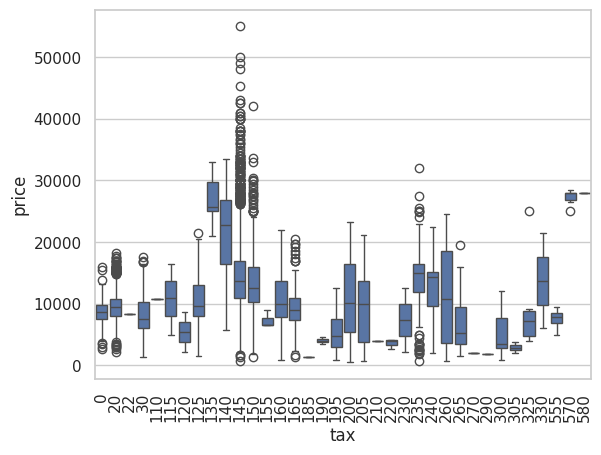

In [107]:
sns.boxplot(x = df['tax'],y = df['price'])
plt.xticks(rotation = 90)

Plotting a scatter plot for engine-size vs price

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

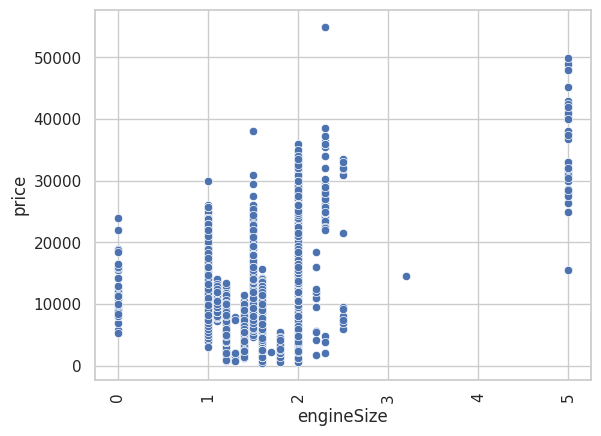

In [108]:

sns.scatterplot(data = df, x = 'engineSize',y = 'price')
plt.xticks(rotation = 90)

Plotting a scatter plot for model vs price

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

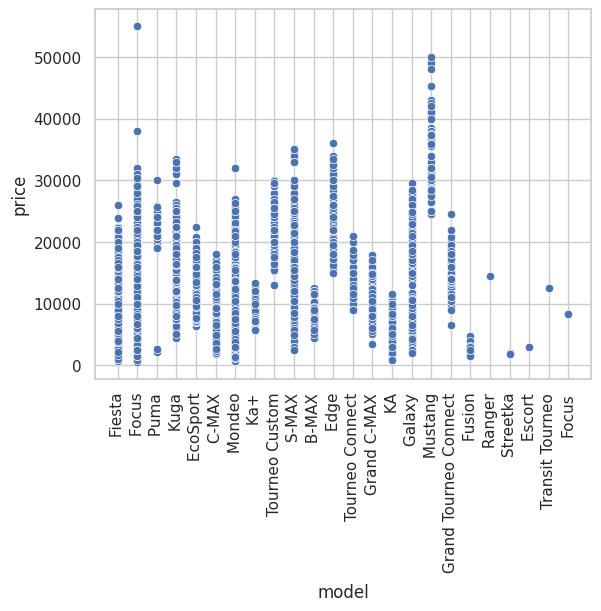

In [109]:

sns.scatterplot(data = df, x = 'model',y = 'price')
plt.xticks(rotation = 90)

Plotting a box plot for model vs price

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

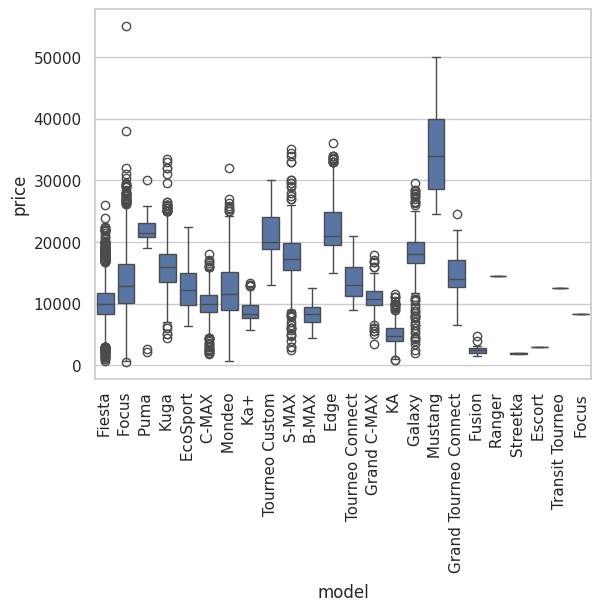

In [110]:
sns.boxplot(x = df['model'],y = df['price'])
plt.xticks(rotation = 90)

Declare feature vector and target variable

x is independent variable and y is dependent variable

In [111]:
X = df.drop(columns = ['price'],axis = 1)
y = df['price']

In [112]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


**LABEL ENCODING**

In [113]:
from sklearn.preprocessing import LabelEncoder

columns = ['model', 'transmission', 'fuelType']

Xlable = X.copy()
label_encoders = {}

for col in columns:
    le = LabelEncoder()
    Xlable[col] = le.fit_transform(Xlable[col].astype(str))
    label_encoders[col] = le

In [114]:
Xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [115]:
Xlable.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [116]:
#Xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
      # 'engineSize']] = scaler.fit_transform(Xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       #'engineSize']])

In [117]:
Xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [119]:
#X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.33, random_state=42)

In [120]:
#model = LinearRegression()
#model.fit(X_train,y_train)

In [121]:
#y_pred = model.predict(X_test)

In [122]:
#y_pred

In [123]:
#y_test

In [124]:
#r2 = r2_score(y_test,y_pred)
#r2

In [125]:
#n = X_test.shape[0]
#p = X_test.shape[1]
#adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
#print("Adjusted R² Score:", adjusted_r2)

In [126]:
#X_train, X_test, y_train, y_test = train_test_split(Xlable, y, test_size=0.33, random_state=42)

In [127]:
#model2 = LinearRegression()
#model2.fit(X_train,y_train)

In [128]:
#y_pred = model2.predict(X_test)

In [129]:
#y_pred

In [130]:
#y_test

In [131]:
#r2 = r2_score(y_test,y_pred)
#r2

In [132]:
#X_one_encode_1 = pd.get_dummies(X,columns = ['model','transmission','fuelType'],drop_first = True)

In [133]:
#X_one_encode_1 = X_one_encode_1.astype(int)

In [134]:
#X_one_encode_1

In [135]:
from sklearn.preprocessing import LabelEncoder

columns = ['model', 'transmission', 'fuelType']

Xlable_1 = X.copy()
label_encoders = {}

for col in columns:
    le = LabelEncoder()
    Xlable_1[col] = le.fit_transform(Xlable_1[col].astype(str))
    label_encoders[col] = le

In [136]:
Xlable_1

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


Splitting the data into separate training and test set

In [137]:
X_train, X_test, y_train, y_test = train_test_split(Xlable_1, y, test_size=0.33, random_state=42)

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [138]:
X_train.shape

(12037, 8)

In [139]:
y_train.shape


(12037,)

**Random Forest**

Using random forest regressor for tarining the model

Random Forest is an ensemble learning algorithm used for both classification and regression tasks.
It builds multiple decision trees and combines their results to improve accuracy and reduce overfitting.

Predicting Car Prices
Each tree might learn a different pattern based on mileage, year, brand, etc. Random Forest combines all trees to give a stable and accurate price estimate

When to Use Random Forest

1.When you want high accuracy

2.When you want a model that generalizes well

3.When interpretability is less important than performance



In [140]:
from sklearn.ensemble import RandomForestRegressor
rf_3=RandomForestRegressor(n_estimators=100,random_state=42)

rf_3.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [141]:
y_pred = rf_3.predict(X_test)

In [142]:
y_pred

array([ 7993.93,  8137.18,  8208.29, ..., 21383.74,  5624.79,  9926.85])

In [143]:
y_test

,price
17610,6995
7076,8999
1713,7998
1611,5491
16830,3790
...,...
6015,19000
10301,10940
15006,21999
5396,6995


R2 score is used to find the accuracy

In [144]:
r2 = r2_score(y_test,y_pred)
r2

0.9208989214728456

Checking the accuracy score  

In [145]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.9207920281234846


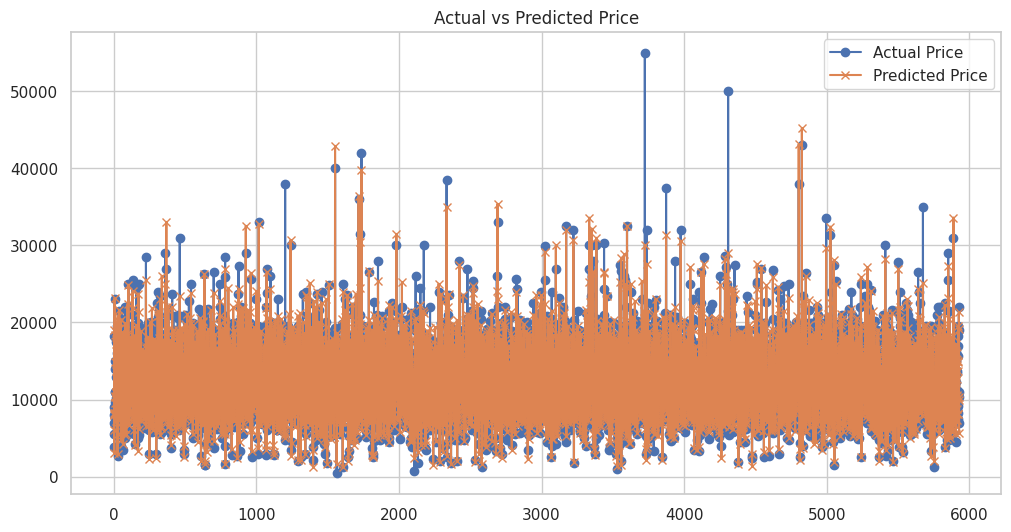

In [146]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(y_pred, label='Predicted Price', marker='x')
plt.title("Actual vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()


**FOR LOCAL HOSTING**

In [147]:
import sklearn
print(sklearn.__version__)

1.6.1


In [148]:
import pickle

In [149]:
filename='trained_model.sav'
pickle.dump(rf_3,open(filename,'wb'))

In [150]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

Plotting multiple charts in a grid

Matplotlib and Seaborn also support plotting multiple charts in a grid, using `plt.subplots`, which returns a set of axes for plotting.

Here's a single grid showing the different types of charts we've covered in this tutorial.

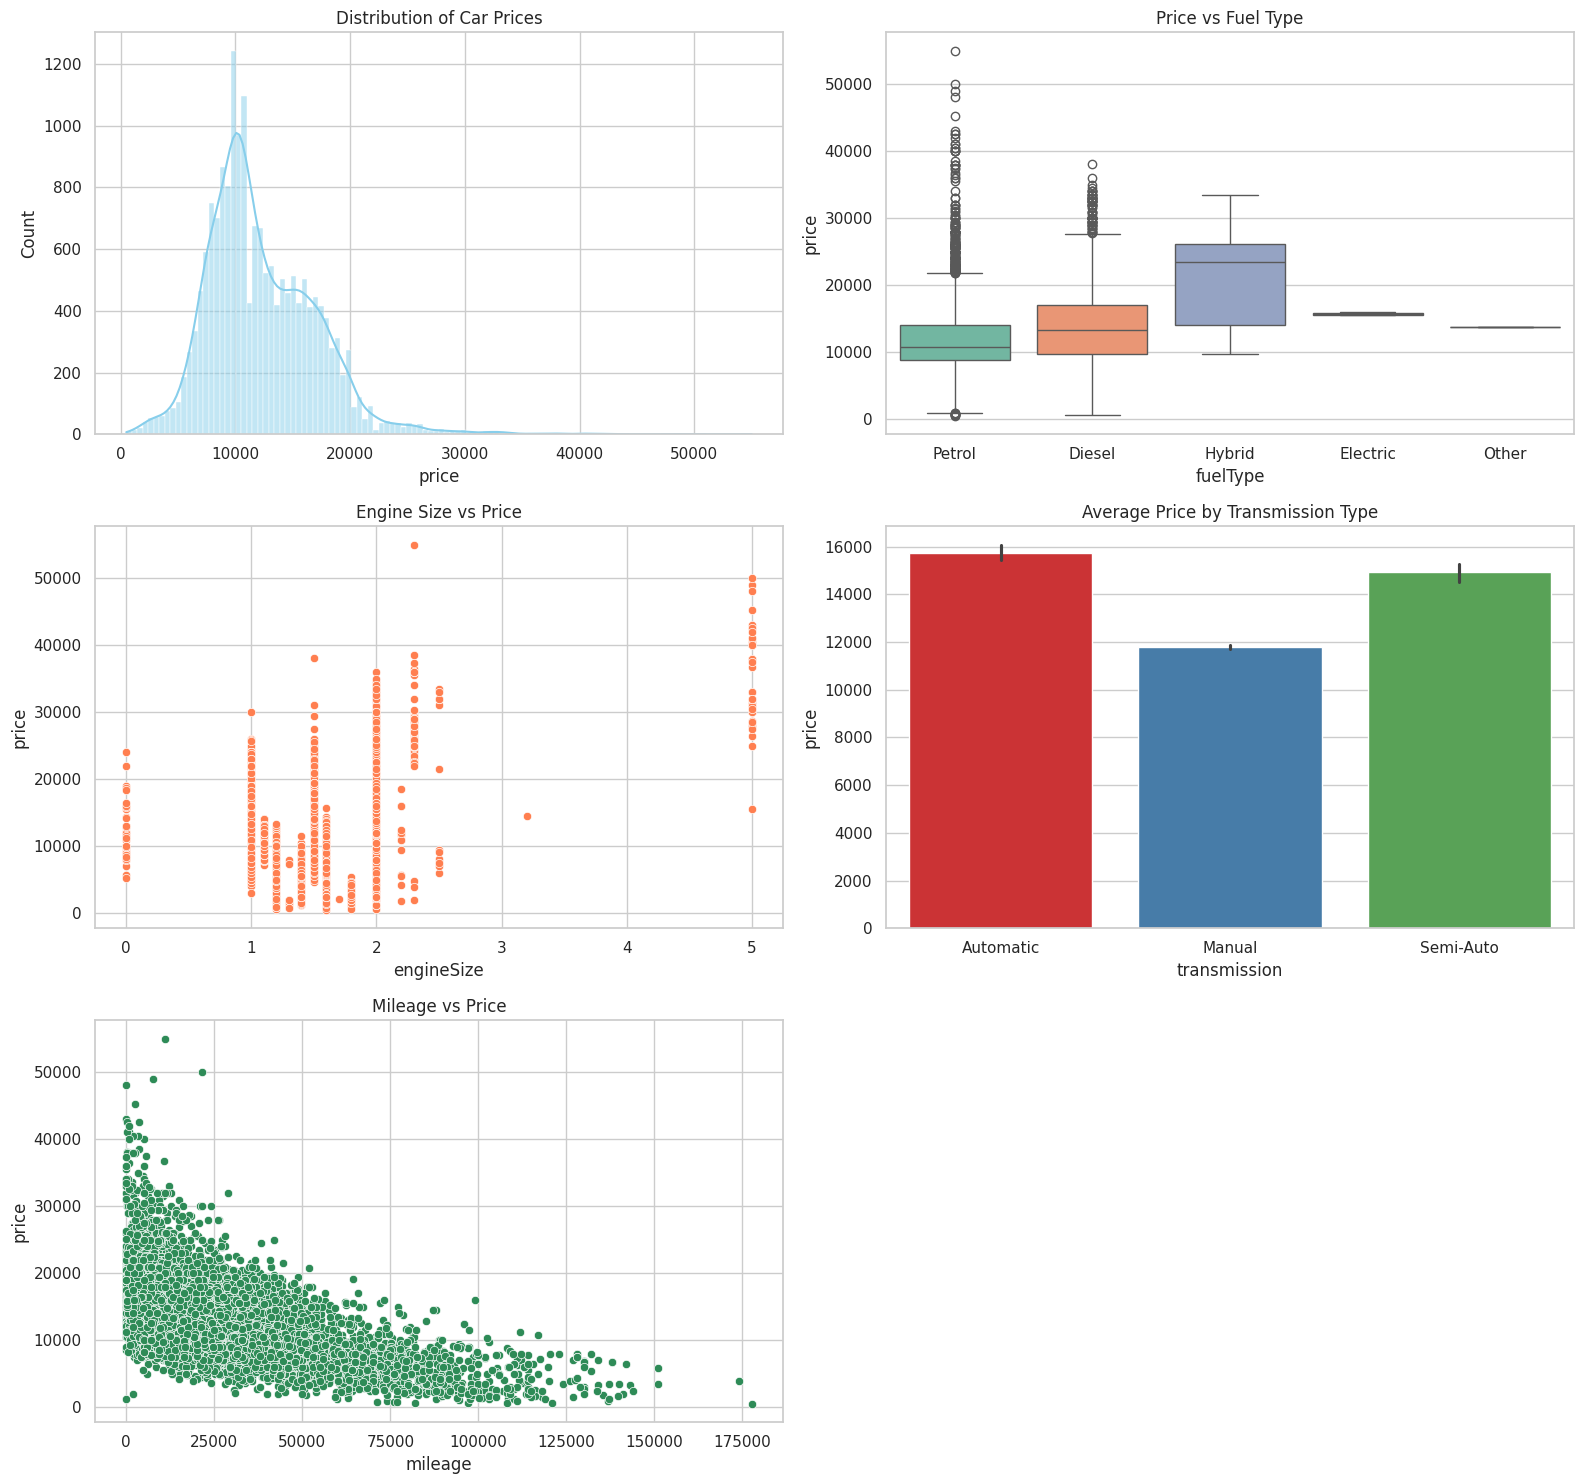

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a 3x2 grid of plots
fig, axes = plt.subplots(3, 2, figsize=(16, 15))

# Plot 1: Histogram of Price
sns.histplot(data=df, x='price', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution of Car Prices")

# Plot 2: Boxplot - Fuel Type vs Price
sns.boxplot(data=df, x='fuelType', y='price', ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Price vs Fuel Type")

# Plot 3: Scatter Plot - Engine Size vs Price
sns.scatterplot(data=df, x='engineSize', y='price', ax=axes[1, 0], color='coral')
axes[1, 0].set_title("Engine Size vs Price")

# Plot 4: Bar Plot - Transmission vs Average Price
sns.barplot(data=df, x='transmission', y='price', estimator='mean', ax=axes[1, 1], palette="Set1")
axes[1, 1].set_title("Average Price by Transmission Type")

# ✅ Plot 5: Scatter Plot - Mileage vs Price
sns.scatterplot(data=df, x='mileage', y='price', ax=axes[2, 0], color='seagreen')
axes[2, 0].set_title("Mileage vs Price")

# Plot 6: Leave empty or use for something else
axes[2, 1].axis('off')  # Turn off the last subplot (empty)

# Adjust layout
plt.tight_layout()
plt.show()
